<a href="https://colab.research.google.com/github/sittaaliyadj/HousePricePrediction/blob/main/pelatihan_kkl_sesi_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530.0,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310.0,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020.0,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600.0,0,2004,0,98027,47.5345,-122.069,1410,1287


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'grade'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>,
        <Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'zipcode'}>],
       [<Axes: title={'center': 'lat'}>,
        <Axes: title={'center': 'long'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>]], dtype=object)

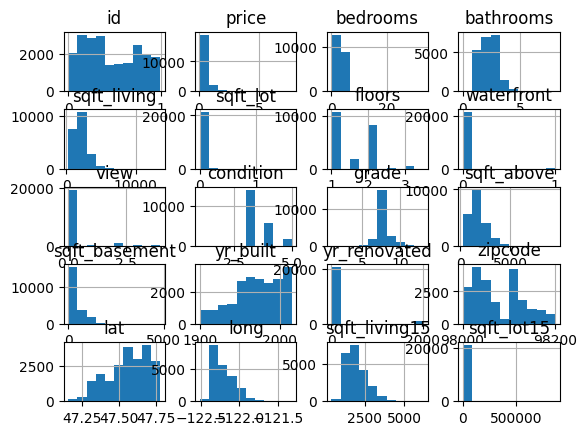

In [5]:
df.hist()

In [6]:

# Mengubah nilai feature 'bathrooms' dan mengubah tipe data menjadi integer
df['bathrooms'] = df['bathrooms'].apply(math.ceil)

df['bathrooms'] = df['bathrooms'].astype(int)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

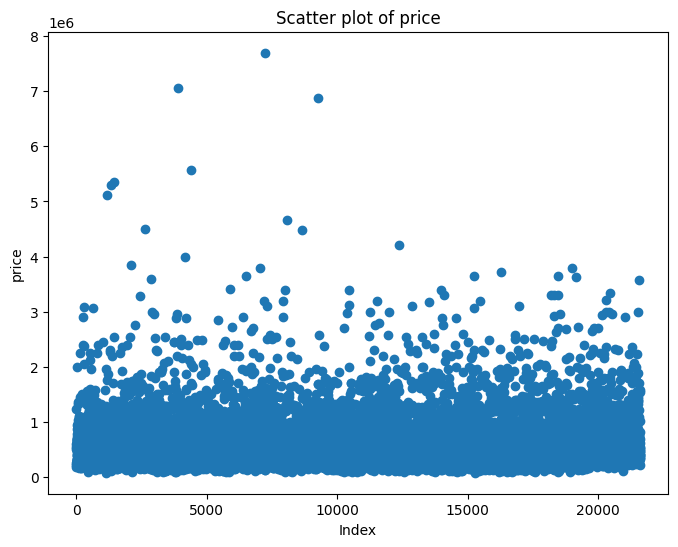

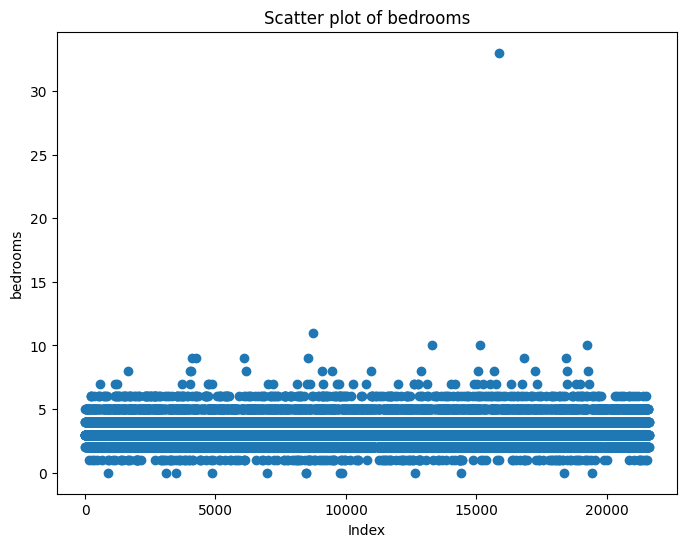

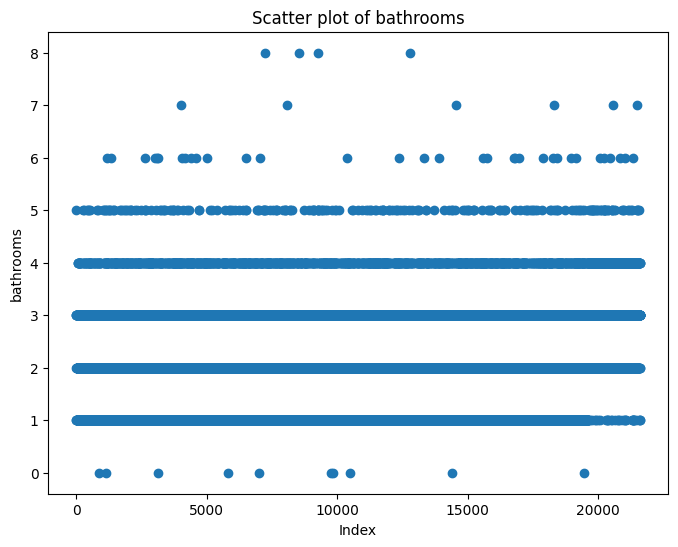

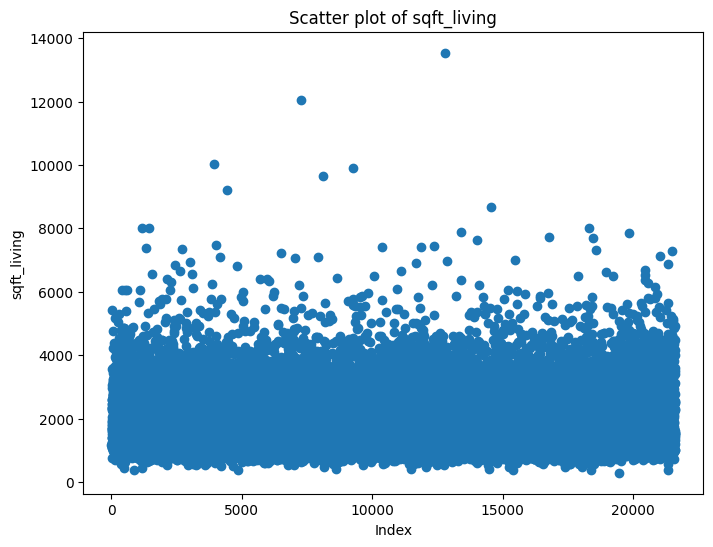

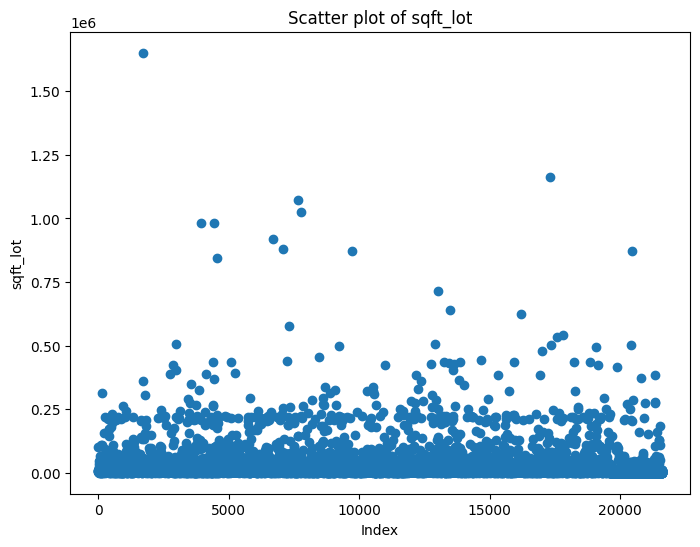

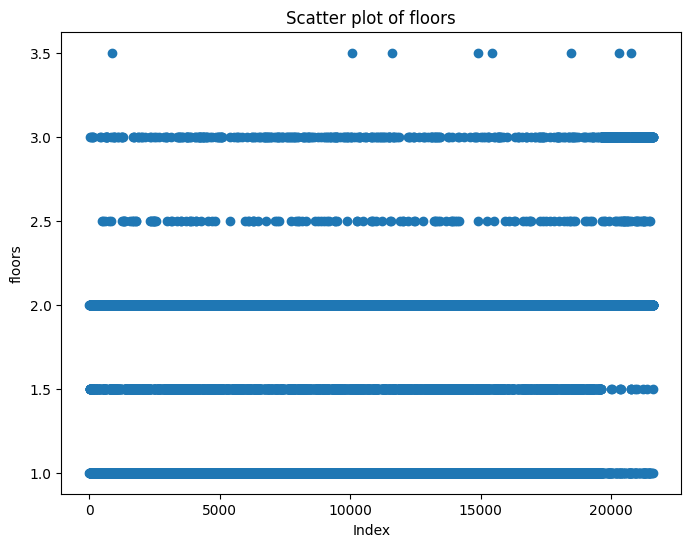

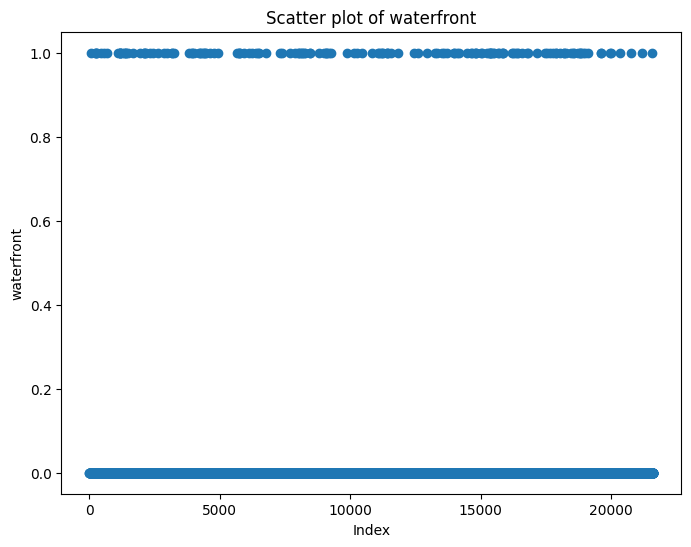

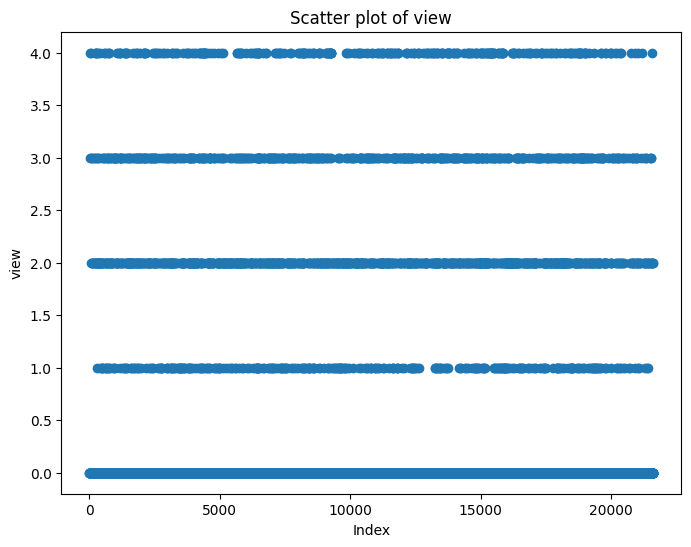

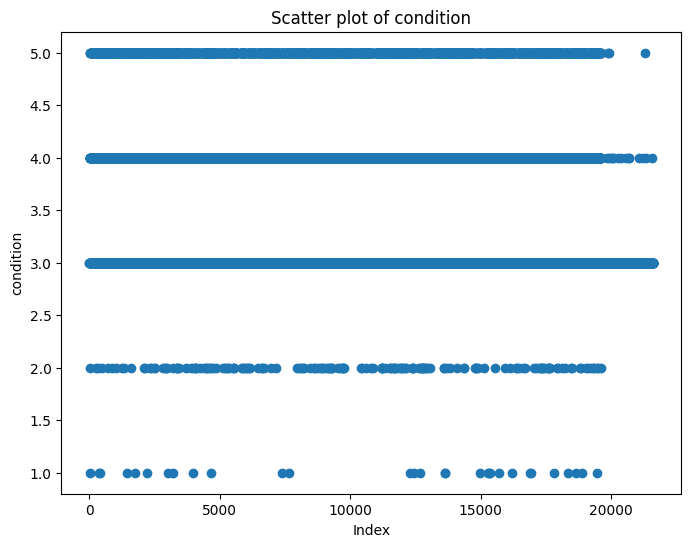

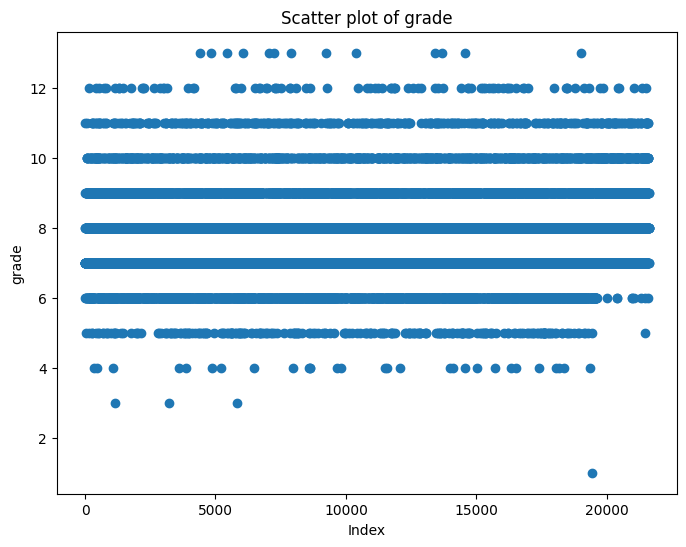

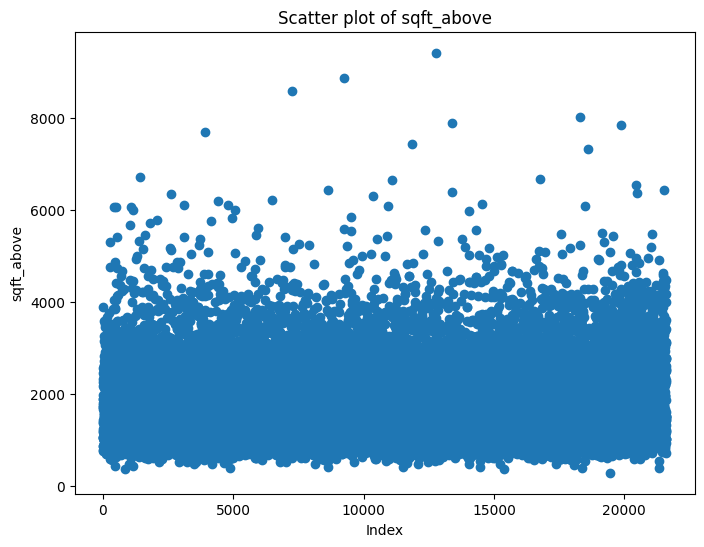

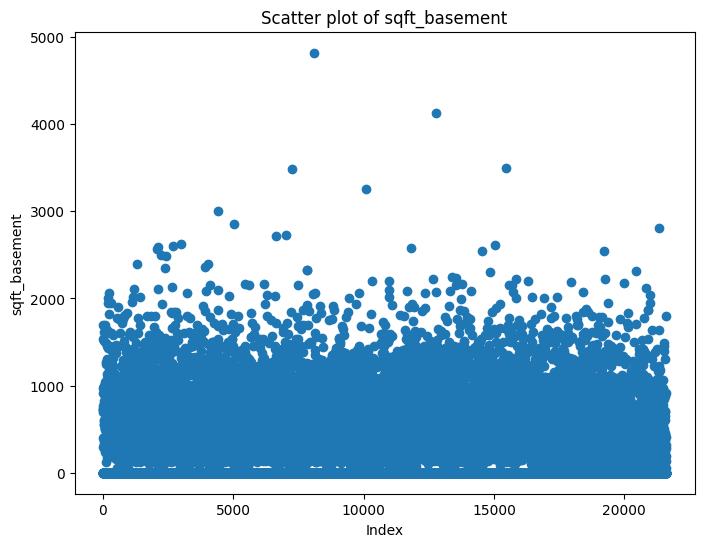

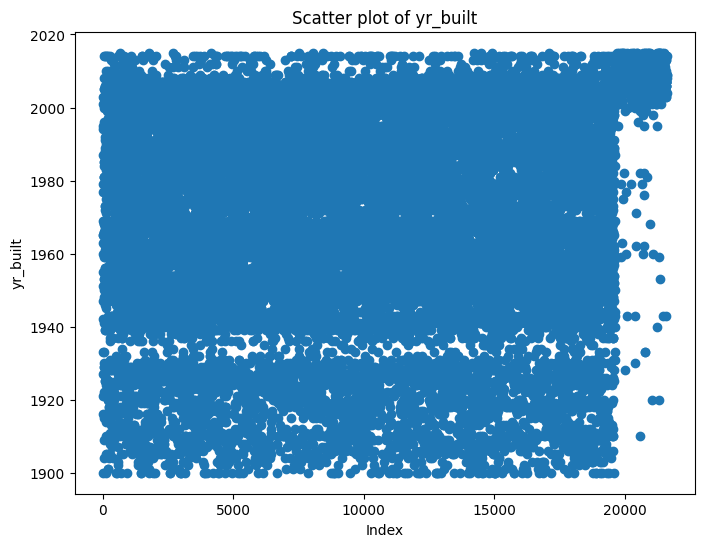

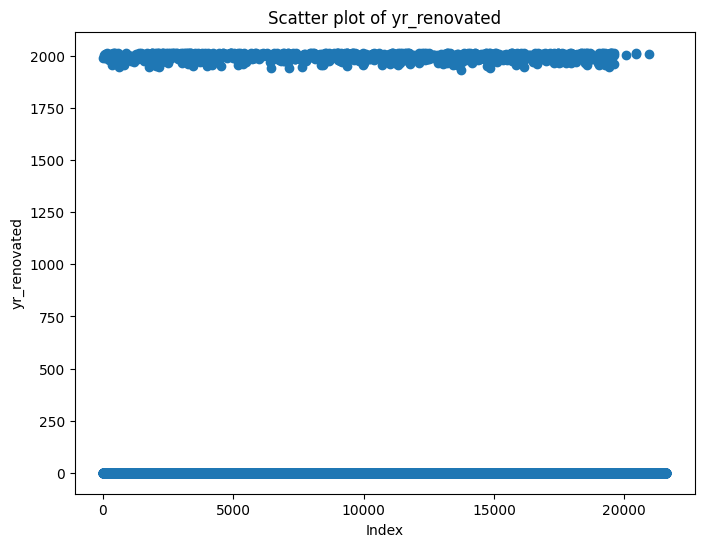

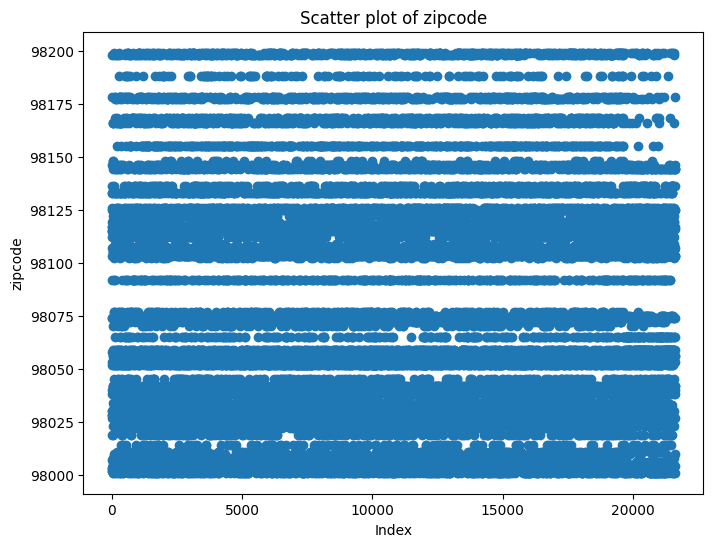

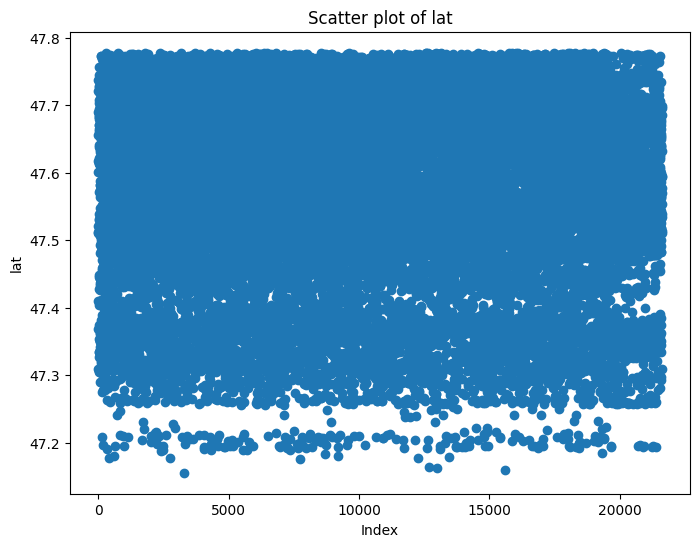

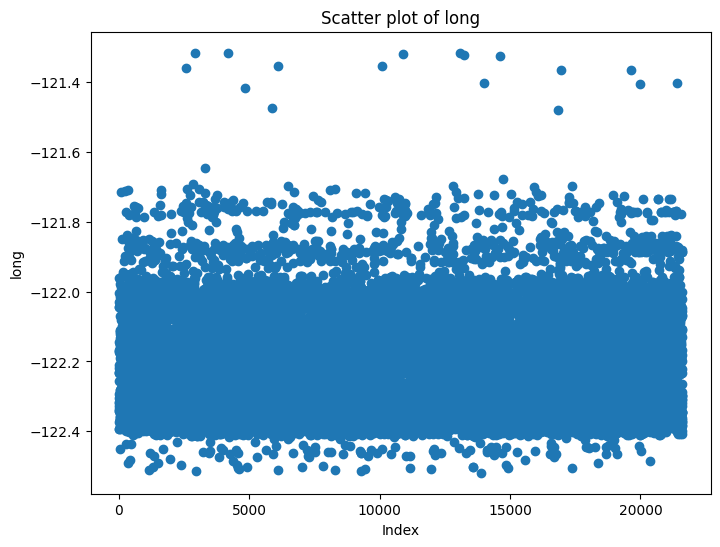

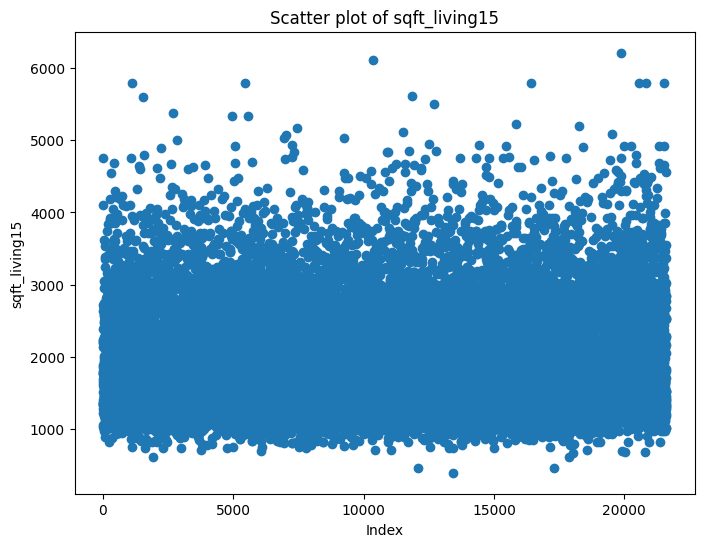

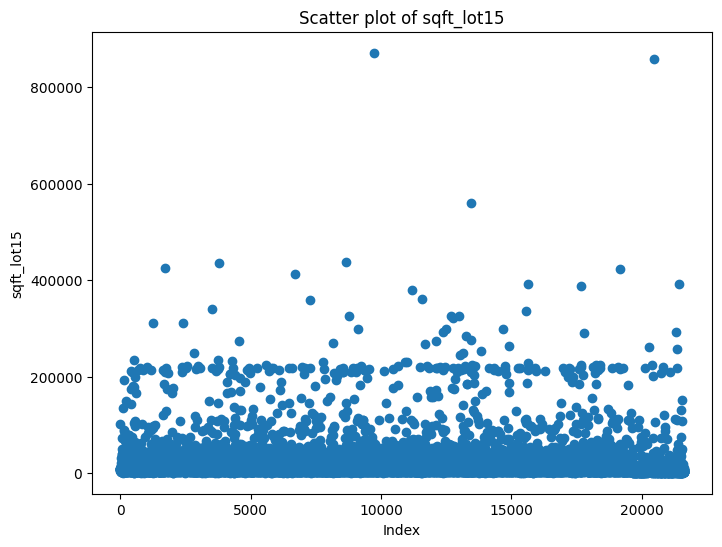

In [ ]:
# Fitur numerik
numerical_features = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view',
                      'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
                      'lat', 'long', 'sqft_living15', 'sqft_lot15']

# Membuat scatter plot untuk setiap fitur numerik
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df.index, df[feature])
    plt.title(f'Scatter plot of {feature}')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()


In [ ]:
# Membuat DataFrame
# Misalkan df adalah DataFrame Anda

# Menghilangkan kolom non-numerik
numeric_features = df.select_dtypes(include=['int64', 'float64'])

# Membuat scatter plot antar fitur
sns.pairplot(numeric_features)
plt.show()

KeyboardInterrupt: 

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x794f493141f0> (for post_execute):


KeyboardInterrupt: 

In [7]:
sns.pairplot(df, diag_kind = 'kde')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7c34e1d14f70> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7c34e1d141f0> (for post_execute):


KeyboardInterrupt: 

<ipython-input-8-34dc32d60672>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr().round(2)


Text(0.5, 1.0, 'Correlation Matrix untuk tiap fitur ')

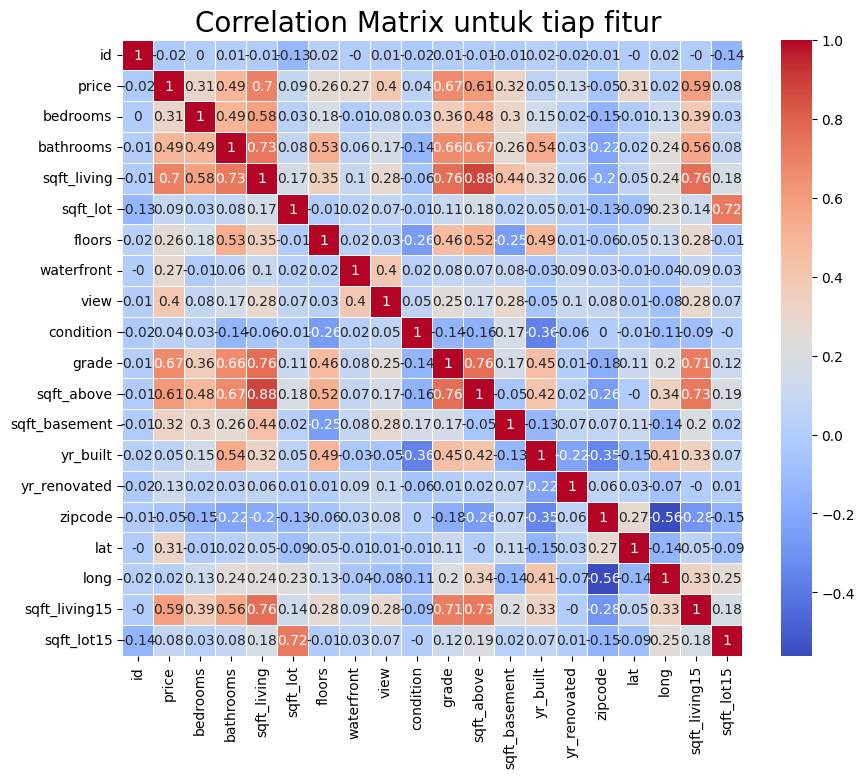

In [8]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)

# Parameter 'annot = True', untuk menampilkan nilai dalam persegi
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk tiap fitur ", size=20)

In [9]:
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']]
y = df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

# Proses Standarisasi

In [15]:
numerical_features = ['bathrooms', 'sqft_living', 'grade', 'sqft_above','sqft_living15']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
21356,0.609509,0.221380,-0.555939,0.599008,1.354317
17220,-1.561640,-1.003874,-1.410700,-0.759840,-0.268902
13336,-1.561640,-0.796018,-0.555939,-0.529321,-0.912340
704,-1.561640,-1.310187,-2.265461,-1.099552,-0.839222
13277,0.609509,0.385477,0.298821,0.780996,0.667008


In [16]:
#import library decision tree

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)

In [20]:
dtr.fit(X_train,y_train)
score_dtr = dtr.score(X_train,y_train)
print(score_dtr)

ValueError: Input X contains NaN.
DecisionTreeRegressor does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values